In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Social_Network_Ads.csv")


df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
315,39,75000,1
75,34,112000,1
223,60,102000,1
293,37,77000,0
302,37,137000,1


In [9]:
#Train Test and Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( df.drop('Purchased', axis=1),  # Features (independent variables)
                                                 df["Purchased"],               # Target variable (dependent variable)
                                                 test_size=0.3,                 # 30% of the data will be used for testing
                                                 random_state=0)                # Seed for reproducibility

x_train.shape,x_test.shape
                                        

((280, 2), (120, 2))

In [11]:
#Implement Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#always remember fit only train data but while transforming the data we need to do on both(train and test data)
scaler.fit(x_train)

#transform train and tests sets
x_trained_scaled = scaler.transform(x_train)
x_tested_scaled = scaler.transform(x_test)


scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [27]:
#x_train

In [13]:
x_trained_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
#converting numpy x_trained_scaled to a dataframe

x_trained_scaled = pd.DataFrame(x_trained_scaled, columns = x_train.columns)
x_tested_scaled  = pd.DataFrame(x_tested_scaled, columns = x_test.columns)

In [16]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(x_trained_scaled.describe(),1)   #after standarization you can see mean always = 0 and std(standard deviation) = 1 always

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


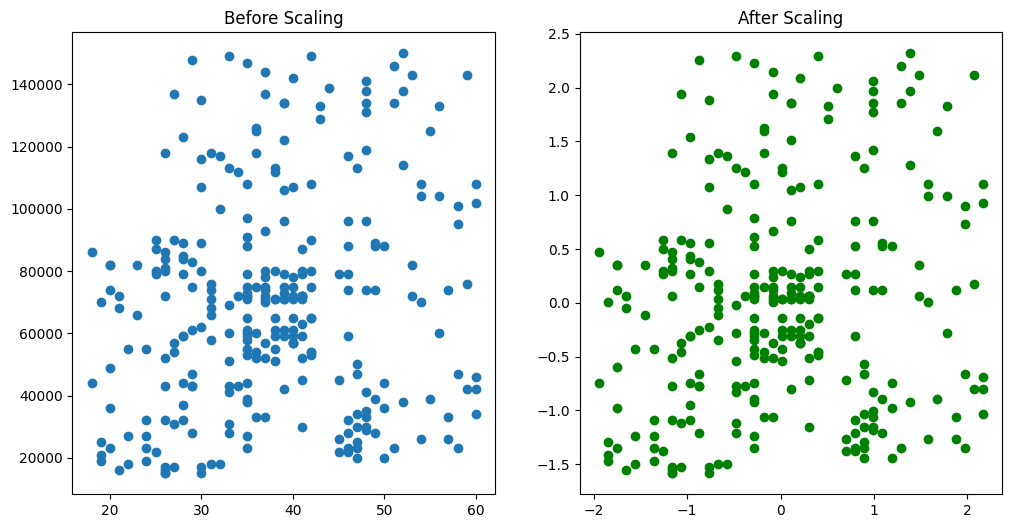

In [28]:
#Effect of scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_trained_scaled['Age'],x_trained_scaled['EstimatedSalary'],color='green')
ax2.set_title("After Scaling")
plt.show()

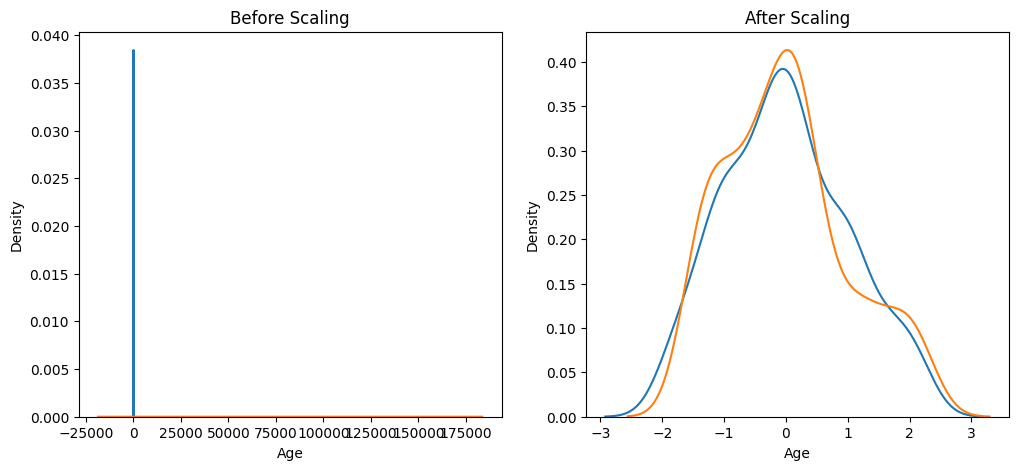

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))


#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_trained_scaled['Age'], ax=ax2)
sns.kdeplot(x_trained_scaled['EstimatedSalary'], ax=ax2)
plt.show()